<a href="https://colab.research.google.com/github/2003Yash/EV-Market-Segmentation/blob/main/market_segmentation_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing first dataset regarding electric vehicles in indian market

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("praveenchoudhary1217/electric-vehicle-sales-in-india")

print("Path to dataset files:", path)

100%|██████████| 9.52k/9.52k [00:00<00:00, 5.59MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/praveenchoudhary1217/electric-vehicle-sales-in-india/versions/1


Converting excel files into data frames

In [3]:
import pandas as pd
import os

In [4]:
# List all files in the dataset directory

files = os.listdir(path)
print("Files in !st path:", files)

Files in !st path: ['Ev Sales.xlsx']


In [6]:
# Identify the relevant file (assuming it's a excel for this example)

excel_files = [file for file in files if file.endswith('.xlsx')]
if not excel_files:
    print("No Excel files found in the dataset directory.")
else:
    for excel_file in excel_files:
        # Read each CSV file into a Pandas DataFrame
        file_path = os.path.join(path, excel_file)
        df = pd.read_excel(file_path)
        print(f"Data from {excel_file}:\n", df.head())

Data from Ev Sales.xlsx:
         YEAR  2 W   3 W  4 W  BUS  TOTAL
0 2017-04-01   96  4748  198    0   5042
1 2017-05-01   91  6720  215    2   7028
2 2017-06-01  137  7178  149    1   7465
3 2017-07-01  116  8775  120    0   9011
4 2017-08-01   99  8905  137    0   9141


Exploratory data analysis (EDA)

In [8]:
df.columns

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')

In [45]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB
None


In [46]:
# Check for missing values
print(df.isnull().sum())

YEAR     0
2 W      0
3 W      0
4 W      0
BUS      0
TOTAL    0
dtype: int64


In [47]:
# Summary statistics
print(df.describe())

                                YEAR            2 W           3 W  \
count                             74      74.000000     74.000000   
mean   2020-04-16 04:12:58.378378496   16938.729730  14851.351351   
min              2017-04-01 00:00:00      85.000000    668.000000   
25%              2018-10-08 18:00:00    1304.250000   7782.250000   
50%              2020-04-16 00:00:00    3014.500000  10619.500000   
75%              2021-10-24 06:00:00   23599.000000  18641.750000   
max              2023-05-01 00:00:00  105154.000000  45225.000000   
std                              NaN   25846.636971  11002.517635   

               4 W         BUS          TOTAL  
count    74.000000   74.000000      74.000000  
mean   1272.567568   82.310811   33144.959459  
min       3.000000    0.000000     958.000000  
25%     187.750000   11.250000    9147.000000  
50%     317.500000   74.500000   14526.000000  
75%    1545.000000  113.500000   43902.750000  
max    8852.000000  331.000000  157788.000

In [41]:
# One-hot encode the DataFrame using pandas' get_dummies()
df1 = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

print(df1.head())

        YEAR  2 W   3 W  4 W  BUS  TOTAL
0 2017-04-01   96  4748  198    0   5042
1 2017-05-01   91  6720  215    2   7028
2 2017-06-01  137  7178  149    1   7465
3 2017-07-01  116  8775  120    0   9011
4 2017-08-01   99  8905  137    0   9141


Analysis of Overall market

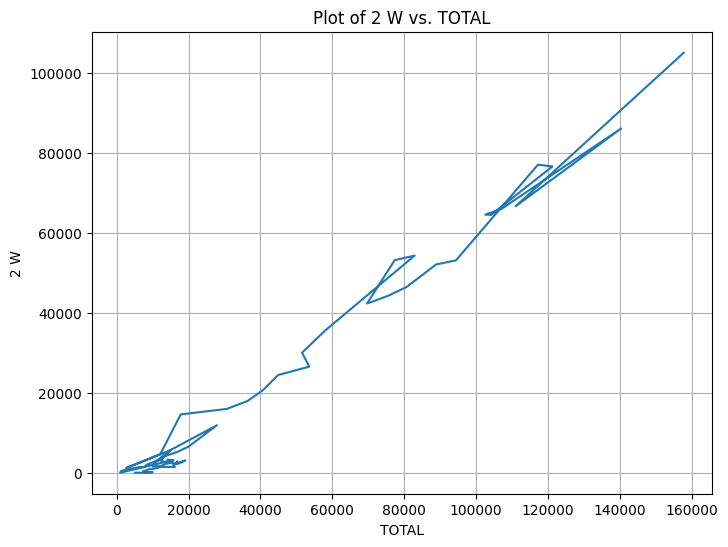

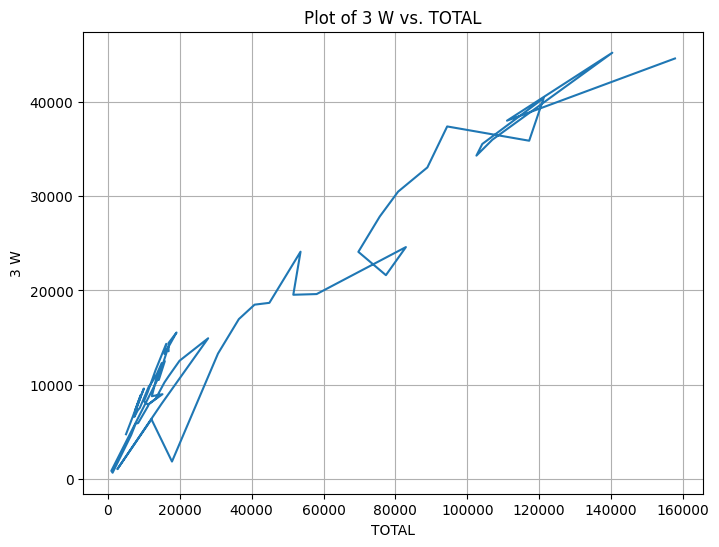

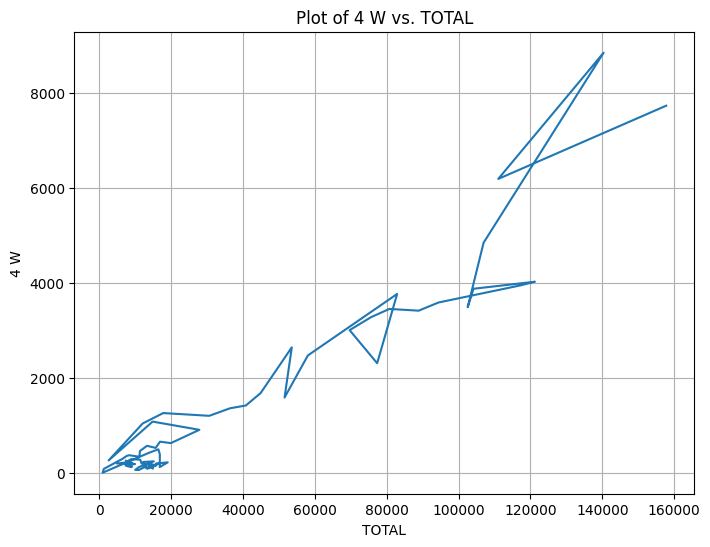

In [32]:
import matplotlib.pyplot as plt

# Assuming df1 and the 'TOTAL' column exist

# Check if the required columns exist in df1 before plotting
if all(col in df1.columns for col in ['2 W', '3 W', '4 W', 'TOTAL']):
    # Plotting each specified column against the 'TOTAL' column
    for col in ['2 W', '3 W', '4 W']:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.plot(df1['TOTAL'], df1[col])
        plt.xlabel('TOTAL')
        plt.ylabel(col)
        plt.title(f"Plot of {col} vs. TOTAL")
        plt.grid(True)
        plt.show()
else:
    print("Error: One or more specified columns are not present in df1")

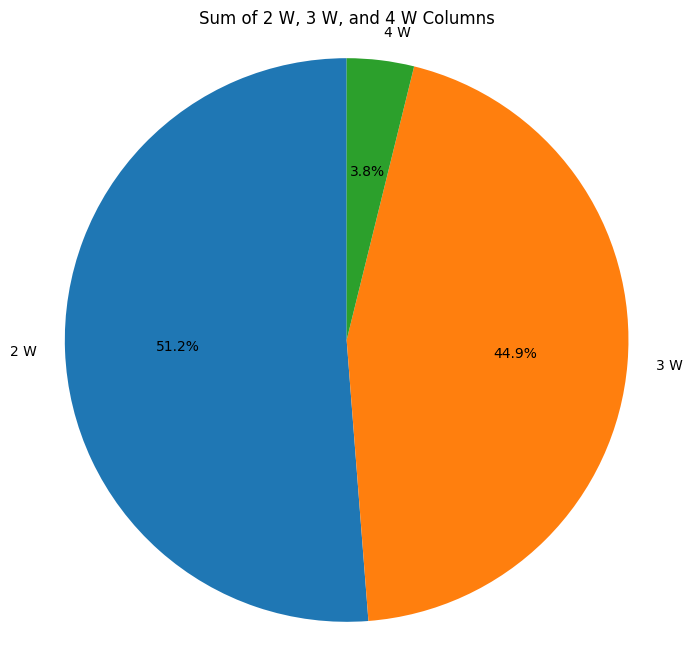

In [35]:
# prompt: plot 2 W, 3 W, 4 W columns sum of df1 in  a piechart

import matplotlib.pyplot as plt

# Assuming df1 is already defined and available in your environment

# Check if the required columns exist in df1 before plotting
if all(col in df1.columns for col in ['2 W', '3 W', '4 W']):
    # Calculate the sum of the specified columns
    column_sums = df1[['2 W', '3 W', '4 W']].sum()

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=90)
    plt.title('Sum of 2 W, 3 W, and 4 W Columns')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Error: One or more specified columns are not present in df1")

This proves that 2-wheelers and 3 wheelers are best and 4 wheelers are also being displaying a consistent uprise in market

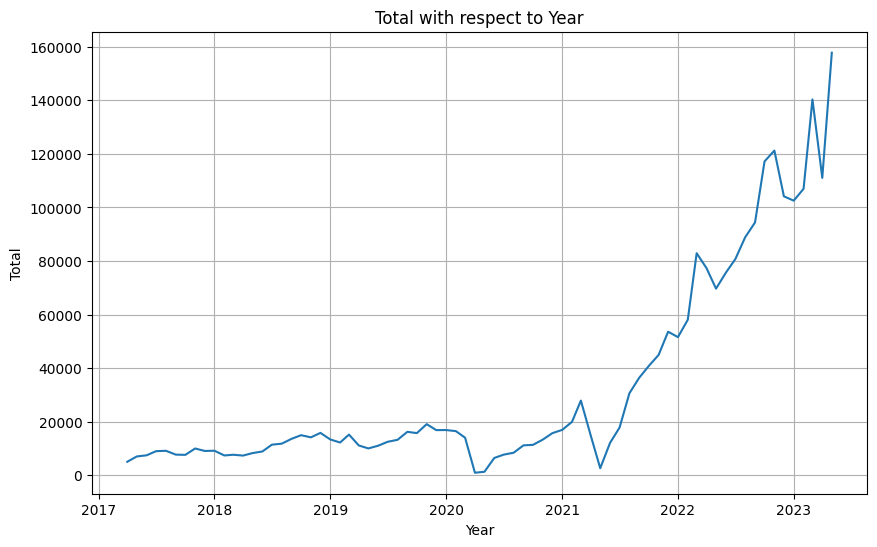

In [16]:
import matplotlib.pyplot as plt

if 'YEAR' in df1.columns and 'TOTAL' in df1.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df1['YEAR'], df1['TOTAL'])
    plt.xlabel('Year')
    plt.ylabel('Total')
    plt.title('Total with respect to Year')
    plt.grid(True)
    plt.show()
else:
    print("Error: 'Year' or 'Total' column not found in df1.")

Above Figure showcased the remarkable growth trajectory of India's two-wheeler market in 2023, underscoring its leading position within the industry.



Market Segmentation

In [49]:
data_bw = pd.read_csv("ev2_bikewale.csv")
data_model = pd.read_csv("ev_model_spec.csv")

In [50]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [51]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [53]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

,0
Maintenance cost,78.672986
Extra Features,78.080569
Performance,59.123223
Value for Money,53.791469
Comfort,37.203791
Ridden for,20.853081
Service Experience,16.706161
Reliability,15.165877
Visual Appeal,12.440758
review,5.568720


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [56]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money']].copy()

In [57]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0


In [58]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [59]:
data_segment = data.iloc[:, 5:13].copy()

In [60]:
data_segment = data_segment.fillna(0.)

In [61]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [62]:
data_segment.mean()

,0
Visual Appeal,3.309242
Reliability,2.811611
Performance,1.441943
Service Experience,2.619668
Extra Features,0.643365
Comfort,2.300948
Maintenance cost,0.723934
Value for Money,1.562796


In [64]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.decomposition import PCA # Import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
pca = PCA(random_state = 42)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.291227,-1.038055,0.354864,0.623469,1.102720,0.169287,0.438012,-0.957827
1,-0.710801,-1.394405,-0.360466,0.621671,-0.320899,0.086053,0.426279,0.149917
2,0.849149,-1.189765,0.167683,0.410898,0.409054,0.191904,0.329993,-0.830738
3,-1.967022,-0.878935,-0.100197,-0.330003,0.075822,-0.069599,-0.013068,-0.011328
4,-0.078940,-1.017161,-0.079210,0.324132,0.961554,-0.005517,0.107260,-0.427972


In [65]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [66]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,0.480170,0.117814,0.063320,0.730598,-0.247014,-0.105903,-0.375474,-0.067539
Reliability,0.494758,0.124910,-0.002776,-0.152447,0.819319,-0.060484,-0.117211,-0.166384
Performance,0.128721,0.459145,0.574833,0.005549,0.019902,0.025704,0.288468,0.598232
Service Experience,0.486499,0.100691,-0.054176,-0.653781,-0.470391,-0.052432,-0.311210,0.044129
Extra Features,0.024373,0.519633,-0.364578,0.023208,-0.116821,-0.559390,0.456829,-0.246323
Comfort,0.418255,-0.304266,0.249807,0.020111,-0.172621,0.296656,0.623271,-0.404238
Maintenance cost,-0.005912,0.513208,-0.386495,0.054822,-0.020302,0.762039,0.003360,-0.055435
Value for Money,0.309572,-0.351548,-0.563840,0.107598,0.046688,-0.009572,0.260855,0.617065


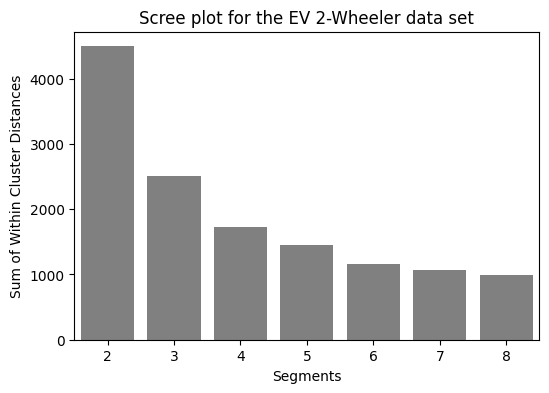

In [67]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]
wcss = [model.inertia_ for model in data_km28]
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.savefig("scree_plot.png")
plt.show()

<ipython-input-68-8d05809fda52>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  wcss_diff['WCSS Difference'][0] = 0
<ipython-input-68-8d05809fda52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

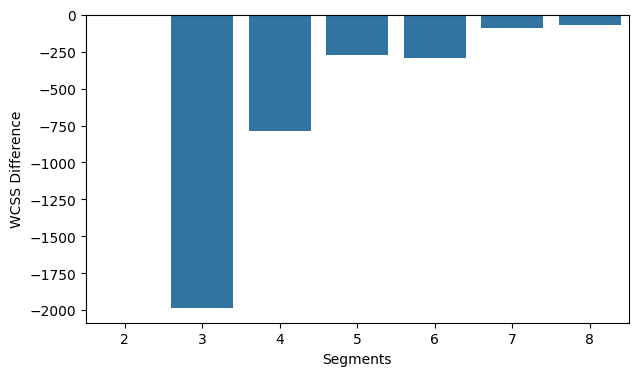

In [68]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments', y = 'WCSS Difference')
plt.savefig("wcss_diff.png")
plt.show()

The decision-making process was significantly guided by the scree plot above, revealing a distinct elbow at four segments. This marked point indicated a substantial reduction in distances, signifying the optimal number of segments for our analysis.

Profiling Segments

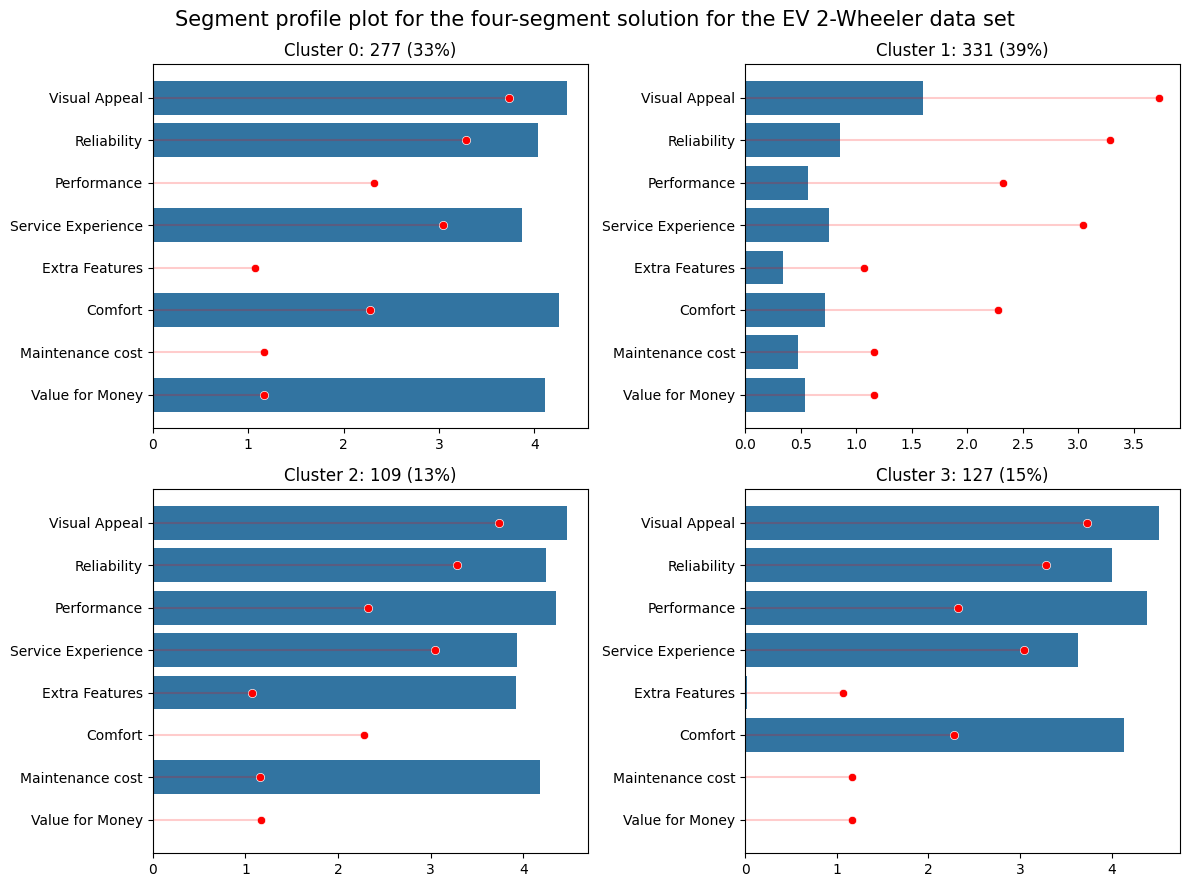

In [70]:
kmeans = data_km28[2]
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

Above graph visually captures the diverse perceptions among different segments. Segment 0, representing 15% of consumers, values the electric two-wheeler vehicle for its visual appeal, reliability, performance, service experience, and comfort. Conversely, Segment 1 (39% of consumers) expresses dissatisfaction across all aspects, marking them as the largest but least satisfied group. Segment 2 (33% of consumers) appreciates visual appeal, reliability, service experience, comfort, and notably, perceives a strong value for money. Lastly, Segment 3 (13% of consumers), the smallest segment, values visual appeal, reliability, performance, service experience, extra features, and maintenance cost, showcasing distinct perceptions, particularly on features and costs.

<ipython-input-73-bcbecddd0a3b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
<ipython-input-73-bcbecddd0a3b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')


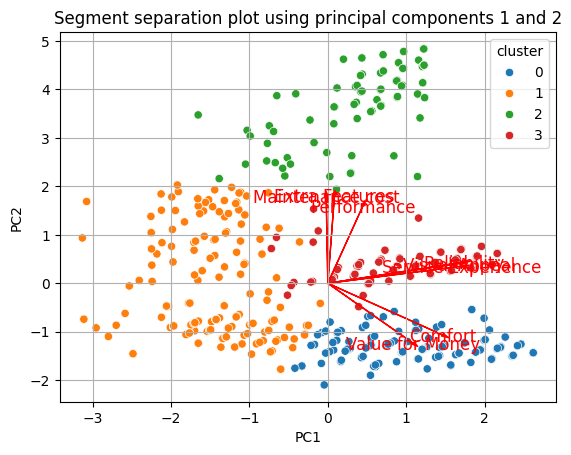

In [73]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.savefig("segment_separation.png")
plt.show()

In analyzing technical specification of electric vehicles across different segments, distinct patterns emerge. Segment 0 prefers premium EVs with a higher price range and extended riding range, emphasizing consumer preference for luxury and long-distance travel. Segment 1 focuses on budget-friendly options with lower prices and moderate riding ranges, suitable for daily commuting. Segment 2 and Segment 3 prioritize affordability, with slight differences in riding range and speed preferences. Weight preferences vary, with Segment 0 and Segment 1 favoring heavier vehicles, while Segment 2 and Segment 3 prefer lighter options. Charging time also differs, with Segment 0 and Segment 3 opting for longer durations for overnight charging, while Segment 1 and Segment 2 prioritize faster charging for quick turnaround times. These nuanced preferences shape the electric vehicle market in India.

Most Optimal Market Segments:-
After thorough analysis and evaluation, Segment 1, constituting 39% of consumers, has been identified as the optimal market segment for electric two-wheeler vehicles. With a significant customer base and a balanced blend of technical specifications and price range, this segment offers substantial market potential. The recommended technical specifications for Segment 1 include a price range of ₹70,688 to ₹1,29,063, riding range of 89 to 180 km, top speed of 58 to 116 kmph, weight of 76 to 120 kg, battery charging time of 3 to 5 hours, and rated power of 1200 to 5500 W. This targeted approach ensures alignment with the diverse needs and preferences of the market, laying the foundation for a successful and sustainable venture into the electric vehicle market.

Conclusion:-
In summary, our in-depth analysis of India's electric vehicle market led us to identify Segment 1 as the optimal target. With a significant 39% consumer base, this segment represents a substantial market opportunity. By tailoring our electric two-wheeler specifications to meet the preferences of this segment, we ensure our products align seamlessly with the demands of a large customer base. This strategic decision is grounded in a thorough understanding of market segmentation, consumer behavior, and technical specifications. These insights provide a clear direction for our market entry, emphasizing precision and relevance in both product development and marketing strategies. Moving forward, this approach equips us with a solid foundation, ensuring our offerings resonate effectively within India's evolving electric vehicle landscape.